# Ex4 - Emily Tseng (et397)

## 1) Presidential Election Simulation I

In [17]:
import numpy as np 
import random
from election_data import mean_std, results2016
from scipy.stats import norm
from matplotlib import pyplot as plt


### A) 

In [68]:
def tally_votes(mean_std, results_dict, bias=0.):
    """
        Runs the analysis specified in part A).
        Input:
            mean_std
            results
            bias: Random correlated bias to add for B)
        Output:
            (
                enum('Clinton', 'Trump'), 
                <int> c_votes,
                <int> t_votes,
            )
    """
    c_votes = 0
    t_votes = 0
    for state in mean_std.keys():
        # Run for Maine and Nebraska statewide values only
        if ' District' in state:
            continue
        val = norm.rvs(mean_std[state][0], mean_std[state][1])
        val += bias
        if 'Maine' in state:
            state = 'Maine'
        if 'Nebraska' in state:
            state = 'Nebraska'
        votes = results_dict[state]['electoral_votes']
        if val <= 0.5: #clinton wins
            c_votes += votes
        elif val > 0.5: #trump wins
            t_votes += votes
    # Declare winner for this trial
    winner = ''
    if c_votes >= 270 and t_votes < 270:
        winner = 'C'
    elif c_votes == t_votes:
        winner = 'TIE'
    elif c_votes < 270 and t_votes >= 270:
        winner = 'T'
    if winner == '':
        print(c_votes, t_votes)
    return (winner, c_votes, t_votes)

In [69]:
# Run simulation n times
def simulate(n):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        totals = tally_votes(mean_std, results2016)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('Clinton won {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump won {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [73]:
# Get pct of trials won by each candidate, plus expectation of number of electoral votes
simulate(10000)

Clinton won 87.58pct of 10000 trials, with an expected electoral vote total of 301.2394
Trump won 11.67pct of 10000 trials, with an expected electoral vote total of 236.7606


## B)

In [71]:
def simulate_b(n):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        bias = norm.rvs(0, .016)
        totals = tally_votes(mean_std, results2016, bias)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('Clinton won {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump won {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [74]:
simulate_b(10000)

Clinton won 72.02pct of 10000 trials, with an expected electoral vote total of 300.5981
Trump won 27.36pct of 10000 trials, with an expected electoral vote total of 237.4019


## C)

In [75]:
def simulate_c(n, bias_loc, bias_size):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        bias = norm.rvs(bias_loc, bias_size)
        totals = tally_votes(mean_std, results2016, bias)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('With norm.rvs({},{})...'.format(bias_loc, bias_size))
    print('Clinton won {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump won {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [78]:
simulate_c(10000, 0.01, 0.01)

With norm.rvs(0.01,0.01)...
Clinton won 53.32pct of 10000 trials, with an expected electoral vote total of 273.5635
Trump won 45.58pct of 10000 trials, with an expected electoral vote total of 264.4365


In [79]:
simulate_c(10000, 0.015, 0.01)

With norm.rvs(0.015,0.01)...
Clinton won 39.4pct of 10000 trials, with an expected electoral vote total of 260.4166
Trump won 59.5pct of 10000 trials, with an expected electoral vote total of 277.5834


## 2) Presidential Election Simulation II

In [81]:
def tally_popular_votes(mean_std, results_dict, bias=0.):
    c_elec = 0
    c_pop = 0
    t_elec = 0
    t_pop = 0
    for state in mean_std.keys():
        # Run for Maine and Nebraska statewide values only
        if ' District' in state:
            continue
        val = norm.rvs(mean_std[state][0], mean_std[state][1])
        val += bias
        if 'Maine' in state:
            state = 'Maine'
        if 'Nebraska' in state:
            state = 'Nebraska'
        elec_votes = results_dict[state]['electoral_votes']
        if val <= 0.5: #clinton wins
            c_elec += elec_votes
        elif val > 0.5: #trump wins
            t_elec += elec_votes
        t_pop += (results_dict[state]['vote_total'] * val)
        c_pop += (results_dict[state]['vote_total'] * (1-val))
    # Declare winner for this trial
    if c_elec >= 270 and t_elec < 270:
        winner = 'C'
    elif c_elec == t_elec:
        winner = 'TIE'
    elif c_elec < 270 and t_elec >= 270:
        winner = 'T'
    return (winner, c_elec, c_pop, t_elec, t_pop)

In [153]:
def simulate_2(n, sigma):
    blowouts = []
    obama = []
    narrow = []
    trump = []
    for it in range(n):
        bias = norm.rvs(0, sigma)
        winner, c_elec, c_pop, t_elec, t_pop = tally_popular_votes(mean_std, results2016, bias)
        margin = ((c_pop - t_pop) / (c_pop + t_pop)) * 100
        if winner == 'C' and margin >= 8.:
            blowouts.append(margin)
        elif winner == 'C' and margin >= 4.:
            obama.append(margin)
        elif winner == 'C':
            narrow.append(margin)
        elif winner == 'T':
            trump.append(margin)
    return blowouts, obama, narrow, trump

n = 10000
blowouts, obama, narrow, trump = simulate_2(n, 0.016)
print('Chance of a Clinton blowout:{}\nChance of Clinton win in "Obama zone":{}\nChance of a narrow Clinton win:{}\nChance of Trump win:{}'.format(len(blowouts)/n, len(obama)/n, len(narrow)/n, len(trump)/n))

Chance of a Clinton blowout:0.0963
Chance of Clinton win in "Obama zone":0.3482
Chance of a narrow Clinton win:0.2806
Chance of Trump win:0.2676


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


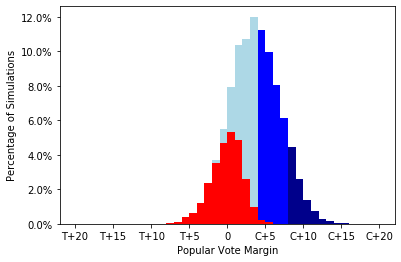

In [154]:
from matplotlib.ticker import PercentFormatter

def plot_pop_margins(*args):
    weights = list()
    total = 0
    for arg in args:
        weights.append(np.ones(len(arg)))
        total += len(arg)
    weights = np.array(weights)
    weights /= total

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,)
    
    ax.hist(args,
        color=['red', 'darkblue', 'blue', 'lightblue'], 
        histtype='barstacked',
        range=(-20,20),
        bins=40,
        weights=weights,
    )
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Percentage of Simulations')
    plt.xlabel('Popular Vote Margin')

    new_labels = list()
    for label in ax.get_xticks():
        if label == 0:
            new_labels.append('0')
        elif label < 0:
            new_labels.append('T+{:.0f}'.format(label*-1))
        elif label > 0:
            new_labels.append('C+{:.0f}'.format(label))
    ax.set_xticklabels(new_labels)
    fig.show()

plot_pop_margins(trump, blowouts, obama, narrow)

## 3) Presidential Election Simulation III

### 3A)

In [164]:
def tally_2020(mean_std, results_dict, bias=0.):
    """
        Runs the analysis specified in part A).
        Input:
            mean_std
            results
            bias: Random correlated bias to add for B)
        Output:
            (
                enum('Clinton', 'Trump'), 
                <int> c_votes,
                <int> t_votes,
            )
    """
    c_votes = 0
    t_votes = 0
    for state in mean_std.keys():
        # Run for Maine and Nebraska statewide values only
        if ' District' in state:
            continue
        if 'Maine' in state:
            state_results_key = 'Maine'
        elif 'Nebraska' in state:
            state_results_key = 'Nebraska'
        else:
            state_results_key = state
        extrapolated_mean = results_dict[state_results_key]['Trump'] / (results_dict[state_results_key]['Trump'] + results_dict[state_results_key]['Clinton']) #two-candidate mean
        extrapolated_mean *= (43.9/46) #discount for loss of support
        val = norm.rvs(extrapolated_mean, mean_std[state][1]*2) #stdev * 2 to account for addtl uncertainty
        val += bias
        votes = results_dict[state_results_key]['electoral_votes']
        if val <= 0.5: #clinton wins
            c_votes += votes
        elif val > 0.5: #trump wins
            t_votes += votes
    # Declare winner for this trial
    winner = ''
    if c_votes >= 270 and t_votes < 270:
        winner = 'C'
    elif c_votes == t_votes:
        winner = 'TIE'
    elif c_votes < 270 and t_votes >= 270:
        winner = 'T'
    if winner == '':
        print(c_votes, t_votes)
    return (winner, c_votes, t_votes)

In [169]:
# Run simulation n times
def simulate_3a(n):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        totals = tally_2020(mean_std, results2016)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('Dem Candidate wins {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump wins {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [170]:
simulate_3a(10000)

Dem Candidate wins 91.49000000000001pct of 10000 trials, with an expected electoral vote total of 316.377
Trump wins 7.960000000000001pct of 10000 trials, with an expected electoral vote total of 221.623


## 3B)

In [171]:
# Run simulation n times
def simulate_3b(n):
    c = {
        'runs': 0,
        'votes': []
    }

    t = {
        'runs': 0,
        'votes': []
    }

    ties = {
        'runs': 0,
        'votes': []
    }

    for it in range(0, n):
        bias = norm.rvs(0, 0.05)
        totals = tally_2020(mean_std, results2016, bias)
        if totals[0] == 'C':
            c['runs'] += 1
        elif totals[0] == 'T':
            t['runs'] += 1
        else:
            ties['runs'] += 1
        c['votes'].append(totals[1])
        t['votes'].append(totals[2])

    # Analyze
    c_pct = float(c['runs'] / n)*100
    c_exp = sum(c['votes']) / len(c['votes'])
    t_pct = float(t['runs'] / n)*100
    t_exp = sum(t['votes']) / len(t['votes'])
    print('Dem Candidate wins {}pct of {} trials, with an expected electoral vote total of {}'.format(c_pct, n, c_exp))
    print('Trump wins {}pct of {} trials, with an expected electoral vote total of {}'.format(t_pct, n, t_exp))

In [172]:
simulate_3b(10000)

Dem Candidate wins 67.19000000000001pct of 10000 trials, with an expected electoral vote total of 313.7651
Trump wins 32.519999999999996pct of 10000 trials, with an expected electoral vote total of 224.2349


## 3C)

In [173]:
def tally_popular_2020(mean_std, results_dict, bias=0.):
    c_elec = 0
    c_pop = 0
    t_elec = 0
    t_pop = 0
    for state in mean_std.keys():
        # Run for Maine and Nebraska statewide values only
        if ' District' in state:
            continue
        if 'Maine' in state:
            state_results_key = 'Maine'
        elif 'Nebraska' in state:
            state_results_key = 'Nebraska'
        else:
            state_results_key = state
        extrapolated_mean = results_dict[state_results_key]['Trump'] / (results_dict[state_results_key]['Trump'] + results_dict[state_results_key]['Clinton']) #two-candidate mean
        extrapolated_mean *= (43.9/46) #discount for loss of support
        val = norm.rvs(extrapolated_mean, mean_std[state][1]*2) #stdev * 2 to account for addtl uncertainty
        val += bias
        votes = results_dict[state_results_key]['electoral_votes']
        if val <= 0.5: #clinton wins
            c_elec += votes
        elif val > 0.5: #trump wins
            t_elec += votes
        t_pop += (results_dict[state_results_key]['vote_total'] * val)
        c_pop += (results_dict[state_results_key]['vote_total'] * (1-val))
    # Declare winner for this trial
    if c_elec >= 270 and t_elec < 270:
        winner = 'C'
    elif c_elec == t_elec:
        winner = 'TIE'
    elif c_elec < 270 and t_elec >= 270:
        winner = 'T'
    return (winner, c_elec, c_pop, t_elec, t_pop)

In [184]:
def simulate_3c(n, sigma):
    blowouts = []
    obama = []
    narrow = []
    trump = []
    for it in range(n):
        bias = norm.rvs(0, sigma)
        winner, c_elec, c_pop, t_elec, t_pop = tally_popular_2020(mean_std, results2016, bias)
        margin = ((c_pop - t_pop) / (c_pop + t_pop)) * 100
        if winner == 'C' and margin >= 8.:
            blowouts.append(margin)
        elif winner == 'C' and margin >= 4.:
            obama.append(margin)
        elif winner == 'C':
            narrow.append(margin)
        elif winner == 'T':
            trump.append(margin)
    return blowouts, obama, narrow, trump

n = 10000
blowouts, obama, narrow, trump = simulate_2(n, 0.05)
print('Chance of a Dem blowout: {}\nChance of Dem win in "Obama zone": {}\nChance of a narrow Dem win: {}\nChance of Trump win: {}'.format(len(blowouts)/n, len(obama)/n, len(narrow)/n, len(trump)/n))

Chance of a Dem blowout: 0.3254
Chance of Dem win in "Obama zone": 0.1489
Chance of a narrow Dem win: 0.1085
Chance of Trump win: 0.4137


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


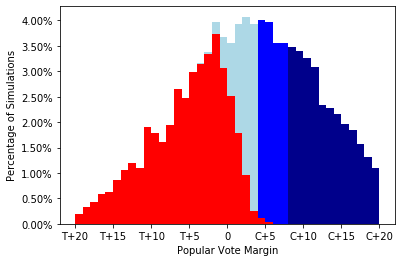

In [185]:
plot_pop_margins(trump, blowouts, obama, narrow)

# 4) COVID

## 4Ai)

In [145]:
R0 = [2.6]*12 + [1.4,1.3,1.3] + [.6]*21
R1 = R0
R2 = R0
R3 = [2.6]*12 + [1.4,1.3,1.3,1.2,1.2,1.1,1.0,.9] + [.4]*16

tests0 = [1000]*4 + [round(1000*1.5**i) for i in range(30)]
tests1 = [100]*5 + [100*3**i for i in range(7)] + [100000]*22
tests2 = [round(10000*1.03**i) for i in range(24)] + [20000]*10
tests3 = [10000]*9 + [round(10000*.8**i) for i in range(25)]

In [104]:
def simulate_4(R, tests, params):
    #Init
    total_pop = 10000000
    infected = [1]
    detected = []
    for idx in range(len(R)):
        new_infected = round(infected[-1] * R[idx])

        if idx >= 2: #Testing happens at a 3-generation lag; 1 interval to test, 2 intervals to report.
            
            # First calculate for those in the tested serointerval the proportions manifesting severe and mild symptoms, and those infected but asymptomatic
            infected_sev = infected[idx-2] * params['severe']
            infected_mild = infected[idx-2] * params['mild']
            infected_asymp = infected[idx-2] * params['asymp']
            uninfected_sev = total_pop * params['uninfected_sev']
            uninfected_mild = total_pop * params['uninfected_mild']
            # total_sev_symptoms = uninfected_sev + infected_sev
            # total_mild_symptoms = uninfected_mild + infected_mild

            # Then calculate what proportions got tested under rationing assumptions
            rationed_tests = round(tests[idx-2] * params['tests_rationed'])
            ondemand_tests = round(tests[idx-2] * params['tests_ondemand'])

            infected_sev_want_test = round(infected_sev * params['sev_seek_tests'])
            uninfected_sev_want_test = round(uninfected_sev * params['sev_seek_tests'])

            infected_mild_want_test = round(infected_mild * params['mild_seek_tests'])
            uninfected_mild_want_test = round(uninfected_mild * params['mild_seek_tests'])

            asymp_want_test = round(infected_asymp * params['asymp_seek_tests'])

            true_pos = 0
            true_neg = 0

            #First do the severe cases
            while rationed_tests + ondemand_tests > 0 and infected_sev_want_test + uninfected_sev_want_test > 0:
                # alternate at random between testing infected and uninfected cases
                r = random.random()
                if r > 0.5 and infected_sev_want_test > 0:
                    infected_sev_want_test -= 1
                    true_pos += 1
                else:
                    uninfected_sev_want_test -= 1
                    true_neg += 1
                if rationed_tests > 0:
                    rationed_tests -= 1
                else:
                    ondemand_tests -= 1
            
            #Then the mild cases
            while rationed_tests + ondemand_tests > 0 and infected_mild_want_test + uninfected_mild_want_test > 0:                
                # alternate at random between testing infected and uninfected cases
                r = random.random()
                if r > 0.5 and infected_mild_want_test > 0:
                    infected_mild_want_test -= 1
                    true_pos += 1
                else:
                    uninfected_mild_want_test -= 1
                    true_neg += 1
                if rationed_tests > 0:
                    rationed_tests -= 1
                else:
                    ondemand_tests -= 1

            #Then the asymptomatic cases; assume no true negatives here
            while rationed_tests + ondemand_tests > 0 and asymp_want_test > 0:                
                true_pos += 1
                asymp_want_test -= 1
                if rationed_tests > 0:
                    rationed_tests -= 1
                else:
                    ondemand_tests -= 1

            # Then calculate based on the true pos and negs and the test rates how many are detected

            detected.append(round(true_pos * (1-params['fnr'])) + round(true_neg * params['fpr']))

        infected.append(new_infected)

    return infected, detected


In [105]:
params = {
    'severe': .1,
    'mild': .6,
    'asymp': .4,
    'uninfected_sev': .001,
    'uninfected_mild': .025,
    'tests_rationed': 0.75,
    'tests_ondemand': 0.25,
    'sev_seek_tests': 1,
    'mild_seek_tests': .5,
    'asymp_seek_tests': .02,
    'fpr': .002,
    'fnr': .2,
}

In [146]:
infected, detected = simulate_4(R1, tests1, params)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


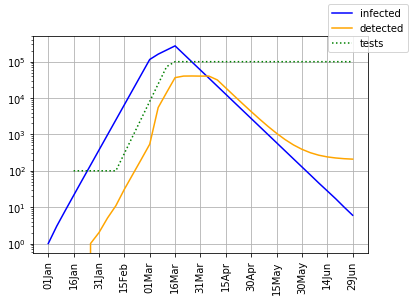

In [147]:
def plot_epidemic_simulation(infected, detected, tests):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(np.arange(len(infected)), infected, 'b', label='infected')
    ax.plot(np.arange(3, len(detected)+3), detected, 'orange', label='detected')
    ax.plot(np.arange(3, len(tests)+3), tests, 'g', linestyle='dotted', label='tests')
    ax.set_yscale('log')
    ax.set_xticks(np.arange(len(infected), step=3))
    ax.set_xticklabels(['01Jan', '16Jan', '31Jan', '15Feb', '01Mar', '16Mar', '31Mar', '15Apr', '30Apr', '15May', '30May', '14Jun', '29Jun'], rotation=90)
    fig.legend()
    plt.grid(which='major')
    fig.show()

plot_epidemic_simulation(infected, detected, tests1)

## 4Aii)

In [54]:
effective_Rs = [1]
for idx, det in enumerate(detected):
    if idx > 1:
        effective_Rs.append(det / detected[idx-1])
print('Largest effective R: ', max(effective_Rs))

Largest effective R:  10.172862453531598


## 4Aiii)

In [72]:
print('On Mar 1 there are...')
new_infected = max(infected)
new_pos_tests = detected[np.argmax(infected)]
print('\t{} newly infected'.format(new_infected))
print('\t{} positive tests registered'.format(new_pos_tests))
print('\tfor a ratio of {} new registered pos tests to new infecteds'.format(new_pos_tests / new_infected))
cum_pos_tests = sum(detected[:np.argmax(infected)])
cum_infecteds = sum(infected[:np.argmax(infected)])
print('\tcumulatively up to this point, the ratio of registered pos tests to infecteds is {}'.format(cum_pos_tests / cum_infecteds))

On Mar 1 there are...
	271801 newly infected
	39827 positive tests registered
	for a ratio of 0.14652999805004396 new registered pos tests to new infecteds
	cumulatively up to this point, the ratio of registered pos tests to infecteds is 0.3178591512856124


## 4Aiv)

In [73]:
print('On Mar 16 there are...')
mar16_idx = np.argmax(infected)+3
new_infected = infected[mar16_idx] #The 16th is three intervals after the 1st
new_pos_tests = detected[mar16_idx]
print('\t{} newly infected'.format(new_infected))
print('\t{} positive tests registered'.format(new_pos_tests))
print('\tfor a ratio of {} new registered pos tests to new infecteds'.format(new_pos_tests / new_infected))
cum_pos_tests = sum(detected[:mar16_idx])
cum_infecteds = sum(infected[:mar16_idx])
print('\tcumulatively up to this point, the ratio of registered pos tests to infecteds is {}'.format(cum_pos_tests / cum_infecteds))

On Mar 16 there are...
	58709 newly infected
	11444 positive tests registered
	for a ratio of 0.1949275238890119 new registered pos tests to new infecteds
	cumulatively up to this point, the ratio of registered pos tests to infecteds is 0.2452148783546342


## 4Av)

In [111]:
print('For the six-month timeframe Jan-Jun...')
cum_pos_tests = sum(detected)
cum_infecteds = sum(infected)
print('\tcumulatively, the ratio of registered pos tests to infecteds is {}'.format(cum_pos_tests / cum_infecteds))

For the six-month timeframe Jan-Jun...
	cumulatively, the ratio of registered pos tests to infecteds is 0.2415219751504355


## 4B)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


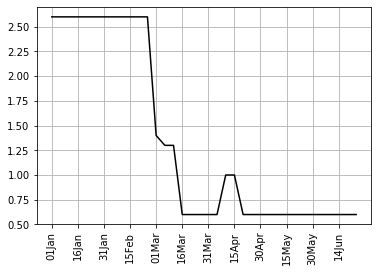

In [141]:
Rb = R0
Rb[20] = 1.0 #The Wisconsin primary gives an R of 1.0 around April 10th
Rb[21] = 1.0 #Easter gives an R of 1.0 around April 15th

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(Rb)), Rb, 'black', label='Rb')
ax.set_xticks(np.arange(len(Rb), step=3))
ax.set_xticklabels(['01Jan', '16Jan', '31Jan', '15Feb', '01Mar', '16Mar', '31Mar', '15Apr', '30Apr', '15May', '30May', '14Jun', '29Jun'], rotation=90)
plt.grid(which='major')
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


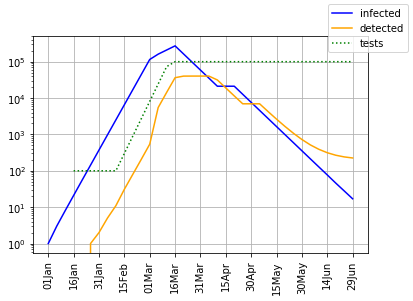

In [142]:
infected_b, detected_b = simulate_4(Rb, tests1, params)
plot_epidemic_simulation(infected_b, detected_b, tests1)

## 4Bi)

In [134]:
#getting the number of new infected below 10 requires extending the timeframe
Rb_extended = Rb + [.6]*5
tests1_extended = tests1 + [tests1[-1]]*5

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


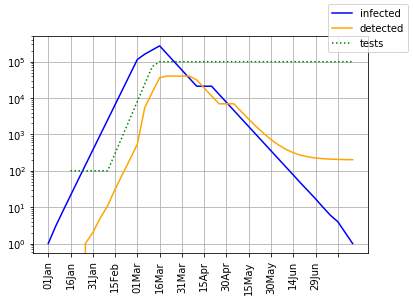

In [138]:
infected_extended, detected_extended = simulate_4(Rb_extended, tests1_extended, params)
plot_epidemic_simulation(infected_extended, detected_extended, tests1_extended)

Getting the actual number of new infecteds below 10 required 2 more timesteps.

## 4bii)

In [150]:
cum_extended = sum(infected_extended[:len(infected)])
cum_orig = sum(infected)
diff = cum_extended-cum_orig
print('This momentary increase in R resulted in {} additional infections through the end of June'.format(diff))
print('Assuming 1% IFR, this is {} more deaths'.format(round(diff * 0.01)))

This momentary increase in R resulted in 42254 additional infections through the end of June
Assuming 1% IFR, this is 423 more deaths


## 4c)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


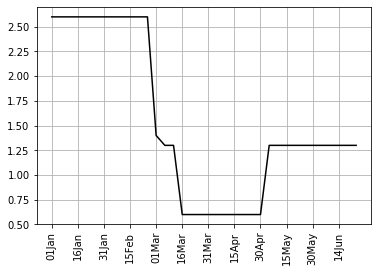

In [157]:
Rc = [2.6]*12 + [1.4,1.3,1.3] + [.6]*21
Rc[25:] = [1.3]*len(Rc[25:]) #R returns to 1.3 for all of May and June

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(Rc)), Rc, 'black', label='Rc')
ax.set_xticks(np.arange(len(Rc), step=3))
ax.set_xticklabels(['01Jan', '16Jan', '31Jan', '15Feb', '01Mar', '16Mar', '31Mar', '15Apr', '30Apr', '15May', '30May', '14Jun', '29Jun'], rotation=90)
plt.grid(which='major')
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


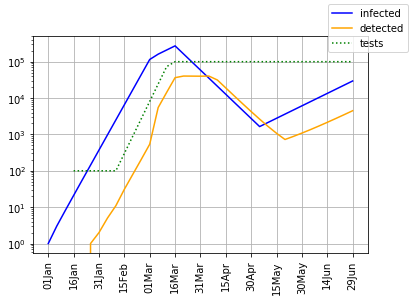

In [158]:
infected_4c, detected_4c = simulate_4(Rc, tests1, params)
plot_epidemic_simulation(infected_4c, detected_4c, tests1)

In [159]:
diff = sum(infected_4c)-sum(infected)
print('This momentary increase in R resulted in {} additional infections through the end of June'.format(diff))
print('Assuming 1% IFR, this is {} more deaths'.format(round(diff * 0.01)))

This momentary increase in R resulted in 118024 additional infections through the end of June
Assuming 1% IFR, this is 1180 more deaths
